<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/DeepLearningFiles/Image_classification_models_using_CNN_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%tensorflow_version 2.x
import os

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
os.chdir("/content/drive/MyDrive/GL_Deeplearning_notebooks/CV_w1")

In [19]:
!ls

casestudy_flowers_classifier.ipynb  Duck_image.jpg  flowers.zip     Week1.ipynb
classifier.h5			    flowers	    my_model.keras


### Image classification modelling using CNN model

In [5]:
# import tensorflow and keras convnets layers and loss functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# build the classification model using CNN layers
clf = Sequential()
clf.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3), padding="same"))
clf.add(MaxPooling2D(pool_size=(2, 2)))
clf.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding="same"))
clf.add(MaxPooling2D(pool_size=(2, 2)))
clf.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding="same"))
clf.add(Dropout(0.2))
clf.add(MaxPooling2D(pool_size=(2, 2)))
clf.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding="same"))
clf.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding="same"))
clf.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
clf.add(MaxPooling2D(pool_size=(2, 2)))
clf.add(Flatten())
clf.add(Dense(128, activation='relu'))
clf.add(Dropout(0.2))
clf.add(Dense(128, activation='relu'))
clf.add(Dropout(0.2))
clf.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 484,101 (1.85 MB)

 Trainable params: 484,101 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# set the adam optimizer
opt = Adam(learning_rate=0.0001)
clf.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train data generator from ./flowers/train

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(
    './flowers/train',
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical'
)

# test datagen
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './flowers/test',
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical'
)

Found 3823 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [12]:
# fit the data to the model
history = clf.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 955s 16s/step - accuracy: 0.2631 - loss: 1.5907 - val_accuracy: 0.2840 - val_loss: 1.4650
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.3989 - loss: 1.3754 - val_accuracy: 0.4600 - val_loss: 1.2071
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.4707 - loss: 1.2391 - val_accuracy: 0.4400 - val_loss: 1.2869
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.5033 - loss: 1.1876 - val_accuracy: 0.5200 - val_loss: 1.1424
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5135 - loss: 1.1483 - val_accuracy: 0.4840 - val_loss: 1.1809
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5199 - loss: 1.1364 - val_accuracy: 0.5300 - val_loss: 1.1058
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.5630 - loss: 1.0752 - val_accuracy: 0.4820 - val_loss: 1.1898
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.5790 - loss: 1.0599 - val_accuracy: 0.5680 - 

In [21]:
# predict on the test data and visualize the prediction
y_pred = clf.predict(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 699ms/step


In [22]:
Y_pred = np.argmax(y_pred, axis=1)

In [27]:
# save the model
#clf.save('model.keras')
#clf.save_weights('.img_clf1_weights.h5')

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
confusion_matrix(test_generator.classes, Y_pred)

array([[20, 20, 16, 26, 18],
       [24, 21, 19, 15, 21],
       [15,  9, 20, 30, 26],
       [16, 12, 22, 31, 19],
       [17, 18, 25, 22, 18]])

In [33]:
print(classification_report(test_generator.classes, Y_pred))

              precision    recall  f1-score   support

           0       0.22      0.20      0.21       100
           1       0.26      0.21      0.23       100
           2       0.20      0.20      0.20       100
           3       0.25      0.31      0.28       100
           4       0.18      0.18      0.18       100

    accuracy                           0.22       500
   macro avg       0.22      0.22      0.22       500
weighted avg       0.22      0.22      0.22       500



### Training Image classification model using transfer learning

In [20]:
import keras
vgg16 = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(64,64,3))
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
vgg16.output

<KerasTensor shape=(None, 2, 2, 512), dtype=float32, sparse=False, name=keras_tensor_18>

In [12]:
# using the function api create the FNN head for the vgg16 model
x = keras.layers.Flatten()(vgg16.output)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, activation='relu')(x)
preds = keras.layers.Dense(5, activation='softmax')(x)

model = keras.models.Model(inputs=vgg16.input, outputs=preds)
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,994,117 (57.20 MB)

 Trainable params: 14,994,117 (57.20 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# freeze the vgg16 layers
for layer in vgg16.layers:
  layer.trainable = False

In [22]:
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,552,977 (59.33 MB)

 Trainable params: 279,429 (1.07 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 558,860 (2.13 MB)

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history1 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 270s 4s/step - accuracy: 0.8666 - loss: 0.3826 - val_accuracy: 0.6600 - val_loss: 1.1630
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.8542 - loss: 0.3880 - val_accuracy: 0.6720 - val_loss: 1.1134
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.8671 - loss: 0.3722 - val_accuracy: 0.6700 - val_loss: 1.1501
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 270s 4s/step - accuracy: 0.8605 - loss: 0.3608 - val_accuracy: 0.6640 - val_loss: 1.2000
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 235s 4s/step - accuracy: 0.8760 - loss: 0.3298 - val_accuracy: 0.6480 - val_loss: 1.1322
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.8660 - loss: 0.3483 - val_accuracy: 0.6720 - val_loss: 1.1926
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 232s 4s/step - accuracy: 0.8746 - loss: 0.3474 - val_accuracy: 0.6660 - val_loss: 1.1746
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.8666 - loss: 0.3525 - val_accuracy: 0.6740 - v

In [26]:
# predict on the validation data
y_pred1 = model.predict(test_generator)
y_pred1 = np.argmax(y_pred1, axis=1)
print(y_pred1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step
[4 0 0 2 1 4 1 3 0 1 0 1 4 0 3 2 2 2 1 3 3 4 1 0 4 1 1 4 3 1 3 2 2 1 3 4 1
 4 2 1 3 2 1 2 2 0 1 4 4 1 4 2 1 0 1 4 2 4 4 3 1 3 2 1 0 2 1 4 1 3 2 0 0 3
 1 4 4 1 3 0 3 0 3 4 1 1 4 0 1 2 1 1 3 2 1 0 1 2 1 4 3 0 3 3 2 2 3 1 0 2 0
 2 4 3 3 0 3 2 0 3 0 3 3 2 3 1 3 0 0 0 2 3 0 1 4 1 4 1 2 0 4 4 0 3 4 0 4 3
 4 4 3 4 4 1 4 4 3 0 4 2 3 4 1 4 3 0 4 4 3 2 0 3 1 0 0 1 3 2 0 1 4 4 1 1 1
 0 0 4 1 1 3 2 3 1 2 4 1 0 4 1 0 2 4 4 3 3 1 0 3 4 3 0 3 0 1 1 0 3 3 4 0 2
 0 4 0 0 3 4 2 2 1 2 1 0 1 0 3 2 3 3 2 2 4 3 2 4 3 3 3 2 1 3 2 1 1 4 1 0 4
 2 2 3 1 4 4 0 4 0 0 4 4 4 4 4 2 2 3 1 0 2 4 0 4 1 1 3 3 2 4 3 2 0 3 2 4 0
 3 0 1 4 1 2 3 0 0 0 3 0 2 2 0 1 2 4 1 1 4 2 3 2 2 4 1 3 2 1 0 2 0 4 0 3 4
 2 2 4 2 2 2 0 0 1 3 3 1 0 4 3 0 2 2 1 1 1 4 3 0 4 1 2 1 0 4 2 1 2 2 4 4 0
 2 3 3 0 4 0 1 1 3 0 4 3 4 4 2 4 1 0 0 3 4 2 0 0 3 2 2 3 2 2 4 2 0 0 3 2 0
 4 0 3 0 4 1 0 3 2 1 4 0 3 4 2 3 4 1 2 0 2 0 4 0 4 4 2 2 0 3 1 3 1 4 3 1 4
 0 3 2 0 0 4 3 1 1 3 3 4 4 1 2 1 3 0 2 2 3 4 1 3 1 4 3 0 4 1 4 

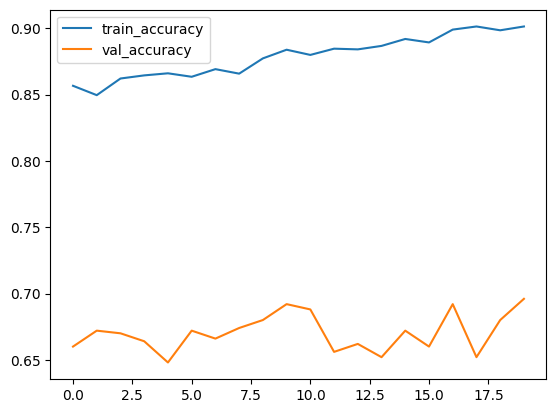

In [28]:
# plotting the history of the training
plt.plot(history1.history['accuracy'], label="train_accuracy")
plt.plot(history1.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

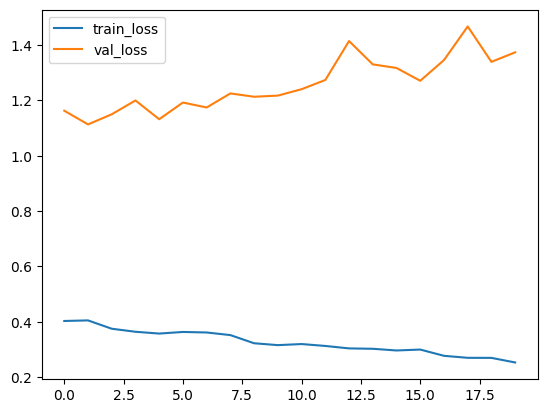

In [29]:
plt.plot(history1.history['loss'], label="train_loss")
plt.plot(history1.history['val_loss'], label="val_loss")
plt.legend()
plt.show()